# Training

In [10]:
from config.config import *
import tf_keras as keras
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import spacy

In [31]:
import os

In [33]:
[x for x in os.walk(MAIN_DIR)]

[('c:\\Users\\ydine\\Documents\\projects\\NLP_Learning\\RCTabstractmodel',
  ['cache',
   'classify',
   'config',
   'datasets',
   'processing',
   'serialization',
   'testing',
   'training'],
  ['README.md', 'test.ipynb', '__init__.py']),
 ('c:\\Users\\ydine\\Documents\\projects\\NLP_Learning\\RCTabstractmodel\\cache',
  [],
  ['dev.csv',
   'dev_20K_replaced_numbers.csv',
   'test.csv',
   'test_20K_replaced_numbers.csv',
   'train.csv',
   'train_20K_replaced_numbers.csv']),
 ('c:\\Users\\ydine\\Documents\\projects\\NLP_Learning\\RCTabstractmodel\\classify',
  [],
  ['classify.py', '__init__.py']),
 ('c:\\Users\\ydine\\Documents\\projects\\NLP_Learning\\RCTabstractmodel\\config',
  ['__pycache__'],
  ['config.py', '__init__.py']),
 ('c:\\Users\\ydine\\Documents\\projects\\NLP_Learning\\RCTabstractmodel\\config\\__pycache__',
  [],
  ['config.cpython-312.pyc',
   'config.cpython-39.pyc',
   '__init__.cpython-312.pyc',
   '__init__.cpython-39.pyc']),
 ('c:\\Users\\ydine\\Documents

In [1]:
from processing.preprocessing import text_to_dataframe

In [19]:
nlp = spacy.load('en_core_web_sm')

In [3]:
text = 'Ginger has a pain-reducing effect and it can modulate pain through various mechanisms: inhibition of prostaglandins via the COX and LOX-pathways, antioxidant activity, inibition of the transcription factor nf-kB, or acting as agonist of vanilloid nociceptor. This narrative review summarizes the last 10-year of randomized controlled trials (RCTs), in which ginger was traditionally used as a pain reliever for dysmenorrhea, delayed onset muscle soreness (DOMS), osteoarthritis (AO), chronic low back pain (CLBP), and migraine. Regarding dysmenorrhea, six eligible studies suggest a promising effect of oral ginger. As concerned with DOMS, the four eligible RCTs suggested a reduction of inflammation after oral and topical ginger administration. Regarding knee AO, nine RCTs agree in stating that oral and topical use of ginger seems to be effective against pain, while other did not find significant differences. One RCT considered the use of ginger in migraine and suggested its beneficial activity. Finally, one RCT evaluated the effects of Swedish massage with aromatic ginger oil on CLBP demonstrated a reduction in pain. The use of ginger for its pain lowering effect is safe and promising, even though more studies are needed to create a consensus about the dosage of ginger useful for long-term therapy.'

In [30]:
import spacy
abstract = []
nlp = spacy.load('en_core_web_sm')
for i,sent in enumerate(nlp(text).sents):
    abstract.append(
        {
            'target': None,
            'text': str(sent).lower(),
            'line_number': i,
        }
    )
df = pd.DataFrame(abstract)
df['total_lines'] = i+1
df

,target,text,line_number,total_lines
0,None,ginger has a pain-reducing effect and it can m...,0,8
1,None,this narrative review summarizes the last 10-y...,1,8
2,None,"regarding dysmenorrhea, six eligible studies s...",2,8
3,None,"as concerned with doms, the four eligible rcts...",3,8
4,None,"regarding knee ao, nine rcts agree in stating ...",4,8
5,None,one rct considered the use of ginger in migrai...,5,8
6,None,"finally, one rct evaluated the effects of swed...",6,8
7,None,the use of ginger for its pain lowering effect...,7,8


In [22]:
doc = nlp(text)

In [26]:
type(doc), type(text)

(spacy.tokens.doc.Doc, str)

In [29]:
[sentence for sentence in enumerate(doc.sents)]

[(0,
  Ginger has a pain-reducing effect and it can modulate pain through various mechanisms: inhibition of prostaglandins via the COX and LOX-pathways, antioxidant activity, inibition of the transcription factor nf-kB, or acting as agonist of vanilloid nociceptor.),
 (1,
  This narrative review summarizes the last 10-year of randomized controlled trials (RCTs), in which ginger was traditionally used as a pain reliever for dysmenorrhea, delayed onset muscle soreness (DOMS), osteoarthritis (AO), chronic low back pain (CLBP), and migraine.),
 (2,
  Regarding dysmenorrhea, six eligible studies suggest a promising effect of oral ginger.),
 (3,
  As concerned with DOMS, the four eligible RCTs suggested a reduction of inflammation after oral and topical ginger administration.),
 (4,
  Regarding knee AO, nine RCTs agree in stating that oral and topical use of ginger seems to be effective against pain, while other did not find significant differences.),
 (5,
  One RCT considered the use of gin

In [13]:
for i, l in enumerate(text.split('.')):
    if l=='':
        break
    print(i, l.strip())

0 Ginger has a pain-reducing effect and it can modulate pain through various mechanisms: inhibition of prostaglandins via the COX and LOX-pathways, antioxidant activity, inibition of the transcription factor nf-kB, or acting as agonist of vanilloid nociceptor
1 This narrative review summarizes the last 10-year of randomized controlled trials (RCTs), in which ginger was traditionally used as a pain reliever for dysmenorrhea, delayed onset muscle soreness (DOMS), osteoarthritis (AO), chronic low back pain (CLBP), and migraine
2 Regarding dysmenorrhea, six eligible studies suggest a promising effect of oral ginger
3 As concerned with DOMS, the four eligible RCTs suggested a reduction of inflammation after oral and topical ginger administration
4 Regarding knee AO, nine RCTs agree in stating that oral and topical use of ginger seems to be effective against pain, while other did not find significant differences
5 One RCT considered the use of ginger in migraine and suggested its beneficial 

In [5]:
from processing.preprocessing import Dataset

In [6]:
model = keras.models.load_model(SERIALIZATION_DIR.joinpath(f'{NAME}.keras'))

In [6]:
lpredictions = model.predict(test_dataset.pipeline)

2024-12-14 17:00:41.446026: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
I0000 00:00:1734175841.636859    2183 cuda_dnn.cc:529] Loaded cuDNN version 90300


942/942 [==============================] - 43s 42ms/step


2024-12-14 17:01:22.435120: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-12-14 17:01:22.435288: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-12-14 17:01:22.435330: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 16303143433776121667
2024-12-14 17:01:22.435349: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 10221427589126133451
2024-12-14 17:01:22.435366: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 1290116226194515673


In [129]:
preds = np.argmax(lpredictions['outputs'], axis=-1)

In [7]:
lmodel.evaluate(test_dataset.pipeline)

942/942 [==============================] - 40s 40ms/step - loss: 0.9084 - accuracy: 0.8410


2024-12-14 17:02:02.722482: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 5115528793007358470
2024-12-14 17:02:02.722570: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 8048777480390521892
2024-12-14 17:02:02.722580: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 10221427589126133451
2024-12-14 17:02:02.722586: I tensorflow/core/framework/local_rendezvous.cc:424] Local rendezvous recv item cancelled. Key hash: 16303143433776121667
2024-12-14 17:02:02.722697: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


[0.9083868861198425, 0.8410485982894897]

In [16]:
groundd_truth = np.array([np.argmax(l) for f,l in test_dataset.pipeline.unbatch().as_numpy_iterator()])

In [19]:
import testing.evaluation


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd1cc4f5f10>,
             BACKGROUND  CONCLUSIONS      METHODS    OBJECTIVE      RESULTS  \
 precision     0.691925     0.876745     0.905524     0.723333     0.844378   
 recall        0.806959     0.879239     0.862888     0.465066     0.903840   
 f1-score      0.745028     0.877990     0.883692     0.566136     0.873098   
 support    3621.000000  4571.000000  9897.000000  2333.000000  9713.000000   
 
            accuracy     macro avg  weighted avg  
 precision  0.841049      0.808381      0.841680  
 recall     0.841049      0.783598      0.841049  
 f1-score   0.841049      0.789189      0.838166  
 support    0.841049  30135.000000  30135.000000  ,
 {'accuracy': 84.10486145677784,
  'precision': 0.8416797639427656,
  'recall': 0.8410486145677784,
  'f1': 0.8381661220758132})

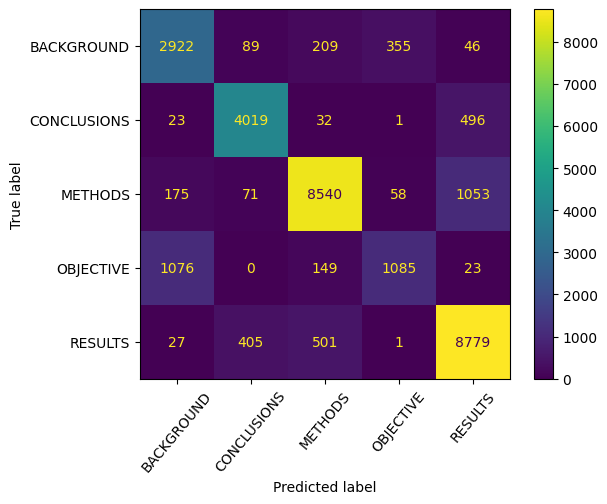

In [22]:
testing.evaluation.get_cm_and_final_results(preds, groundd_truth)

In [119]:
transition_matrix = np.zeros(shape=(NUM_CLASSES,NUM_CLASSES))
for f,label in train_dataset.pipeline.unbatch().as_numpy_iterator():
    if f['line_of']:
        transition_matrix[last,:] = transition_matrix[last,:] + label
    last = np.argmax(label)


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[1.1363e+04 4.0000e+00 5.4920e+03 1.8330e+03 3.4300e+02]
 [2.6300e+03 1.2345e+04 2.0200e+02 1.1000e+01 7.0000e+00]
 [1.0500e+02 8.5700e+02 4.4551e+04 5.9000e+01 1.3553e+04]
 [2.3300e+02 7.0000e+00 9.0050e+03 4.4150e+03 1.7800e+02]
 [9.0000e+00 1.3942e+04 2.4000e+01 0.0000e+00 4.3872e+04]]


In [154]:
transition_matrix.sum()

165040.0

In [118]:
transition_probabilities = transition_matrix/np.repeat(np.sum(transition_matrix, axis=-1), NUM_CLASSES).reshape(NUM_CLASSES,NUM_CLASSES)

In [171]:
def add_matrix_v1(dataset : Dataset, predictions, weight):
    test = predictions['outputs'].copy()
    for i, (features, labels) in enumerate(dataset.pipeline.unbatch().as_numpy_iterator()):
        probabilities = test[i,...]
        line = features['line_of']
        if line:
            # print('last:', last_probs, '====> now', probabilities)
            test[i,...] = probabilities * (1-weight) + np.dot(transition_probabilities, last_probs) * weight
        last_probs =  test[i,...]
    return test

In [160]:
def add_matrix_v2(dataset : Dataset, predictions, weight):
    test = predictions['outputs'].copy()
    for i, (features, labels) in enumerate(dataset.pipeline.unbatch().as_numpy_iterator()):
        probabilities = test[i,...]
        line = features['line_of']
        if line:
            # print('last:', last_probs, '====> now', probabilities)
            x = probabilities*np.dot(transition_probabilities, last_probs)
            test[i,...] = x/x.sum()
        last_probs =  test[i,...]
    return test

In [161]:
new = add_matrix_v2(test_dataset,predictions=lpredictions, weight=0.3)

In [162]:
preds2 = np.argmax(new, axis=-1)

In [167]:
preds, preds2, groundd_truth


(array([0, 4, 2, ..., 4, 4, 1]),
 array([0, 0, 2, ..., 4, 4, 4]),
 array([0, 4, 4, ..., 4, 4, 1]))

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd16862dd30>,
             BACKGROUND  CONCLUSIONS      METHODS    OBJECTIVE      RESULTS  \
 precision     0.691925     0.876745     0.905524     0.723333     0.844378   
 recall        0.806959     0.879239     0.862888     0.465066     0.903840   
 f1-score      0.745028     0.877990     0.883692     0.566136     0.873098   
 support    3621.000000  4571.000000  9897.000000  2333.000000  9713.000000   
 
            accuracy     macro avg  weighted avg  
 precision  0.841049      0.808381      0.841680  
 recall     0.841049      0.783598      0.841049  
 f1-score   0.841049      0.789189      0.838166  
 support    0.841049  30135.000000  30135.000000  ,
 {'accuracy': 84.10486145677784,
  'precision': 0.8416797639427656,
  'recall': 0.8410486145677784,
  'f1': 0.8381661220758132})

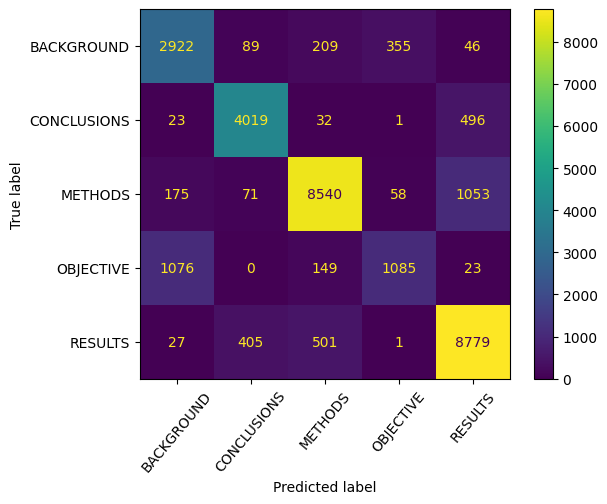

In [158]:
testing.evaluation.get_cm_and_final_results(preds, groundd_truth)

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd1459309b0>,
             BACKGROUND  CONCLUSIONS      METHODS    OBJECTIVE      RESULTS  \
 precision     0.679571     0.880374     0.907363     0.745324     0.851920   
 recall        0.804750     0.864581     0.877842     0.444063     0.911562   
 f1-score      0.736882     0.872406     0.892358     0.556540     0.880732   
 support    3621.000000  4571.000000  9897.000000  2333.000000  9713.000000   
 
            accuracy     macro avg  weighted avg  
 precision  0.844334      0.812910      0.845483  
 recall     0.844334      0.780560      0.844334  
 f1-score   0.844334      0.787784      0.840904  
 support    0.844334  30135.000000  30135.000000  ,
 {'accuracy': 84.43338310934129,
  'precision': 0.8454827525727264,
  'recall': 0.844333831093413,
  'f1': 0.8409041999101674})

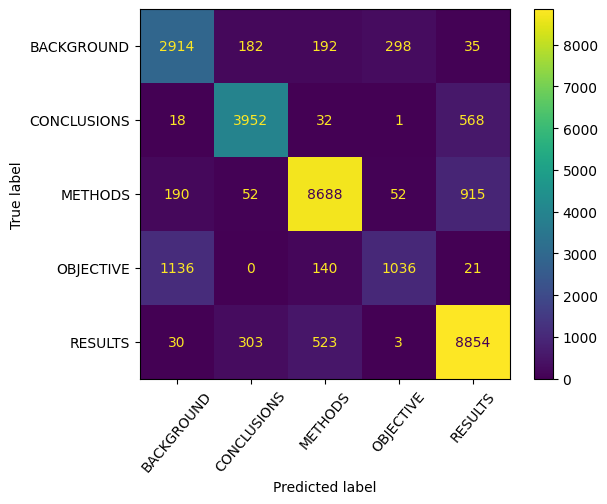

In [159]:
testing.evaluation.get_cm_and_final_results(preds2, groundd_truth)

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd1477901a0>,
             BACKGROUND  CONCLUSIONS      METHODS    OBJECTIVE      RESULTS  \
 precision     0.492398     0.760699     0.704980     0.553866     0.674294   
 recall        0.831814     0.361628     0.785187     0.359194     0.646247   
 f1-score      0.618608     0.490214     0.742925     0.435777     0.659973   
 support    3621.000000  4571.000000  9897.000000  2333.000000  9713.000000   
 
            accuracy     macro avg  weighted avg  
 precision   0.64878      0.637248      0.666299  
 recall      0.64878      0.596814      0.648780  
 f1-score    0.64878      0.589499      0.639139  
 support     0.64878  30135.000000  30135.000000  ,
 {'accuracy': 64.8780487804878,
  'precision': 0.6662986072625612,
  'recall': 0.6487804878048781,
  'f1': 0.6391392082496492})

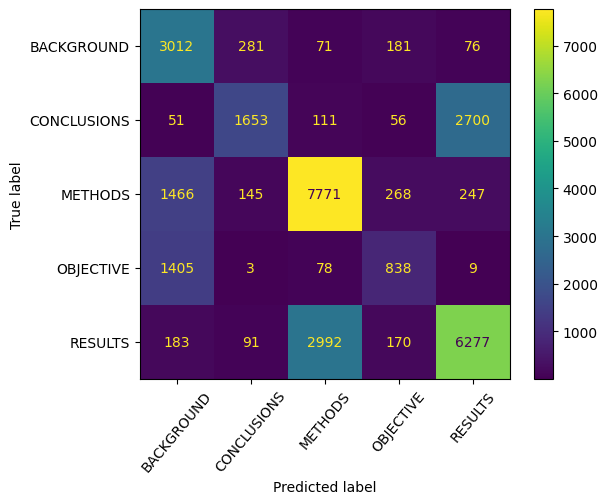

In [166]:
testing.evaluation.get_cm_and_final_results(preds2, groundd_truth)